# Titanic dataset

## VARIABLE DESCRIPTIONS
* Pclass = Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* survived = Survival (0 = No; 1 = Yes)
* Sibsp = Number of Siblings/Spouses Aboard
* Parch = Number of Parents/Children Aboard
* Ticket = Ticket Number
* Fare = Passenger Fare (British pound)
* Embarked = Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

## Train data_set

In [2]:
df = pd.read_csv(r'D:\ML_WORK\Kaggle\Titanic\train_preprocessed.csv')

In [3]:
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## input and output feature

In [4]:
X = df.loc[:,['Sex', 'Age', 'SibSp','Parch','Fare','Embarked']]

y = df.loc[:,'Survived']

## onehotencoding

In [5]:
X = pd.get_dummies(data=X,columns=['Sex','Embarked'])

## Standardisation

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
standard_scale = StandardScaler()

scaled_X = standard_scale .fit_transform(X) 

## train and test split

In [8]:
from sklearn.model_selection import train_test_split

In [131]:
x_train, x_test, y_train, y_test = train_test_split(scaled_X, y , test_size = 1/4, random_state=100)

In [132]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.grid_search import GridSearchCV

## Hyperparameter tuning

In [133]:
RF = RandomForestClassifier()

In [134]:
n_estimators = np.arange(10,50,5)

criterion = [ 'gini', 'entropy']

para = dict(n_estimators = n_estimators, criterion = criterion)

para

{'criterion': ['gini', 'entropy'],
 'n_estimators': array([10, 15, 20, 25, 30, 35, 40, 45])}

In [135]:
#grid = GridSearchCV(estimator= RF, param_grid= para, cv=5, scoring='precision', n_jobs=-1)

#grid.fit(x_train, y_train)

## Random forest model

In [136]:
clf = RandomForestClassifier(n_estimators = 12, criterion ='gini',random_state=0)

clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=12, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [137]:
yhat_train = clf.predict(x_train)

yhat_test = clf.predict(x_test)

## Model accuracy

In [138]:
from sklearn.metrics import classification_report,confusion_matrix

## Model accuracy on train dataset

In [139]:
print(classification_report(y_train,yhat_train))

             precision    recall  f1-score   support

          0       0.97      0.98      0.98       422
          1       0.97      0.96      0.96       246

avg / total       0.97      0.97      0.97       668



## Model accuracy on test dataset

In [140]:
print(classification_report(y_test,yhat_test))

             precision    recall  f1-score   support

          0       0.81      0.87      0.84       127
          1       0.80      0.73      0.77        96

avg / total       0.81      0.81      0.81       223



## Confusion matrix

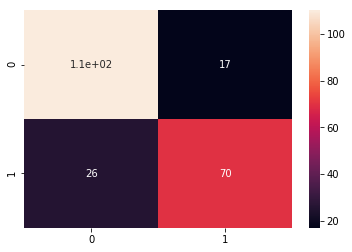

[[110  17]
 [ 26  70]]


In [99]:
sns.heatmap(confusion_matrix(y_test,yhat_test),annot=True)
plt.show()

print(confusion_matrix(y_test,yhat_test))

## feartures weight

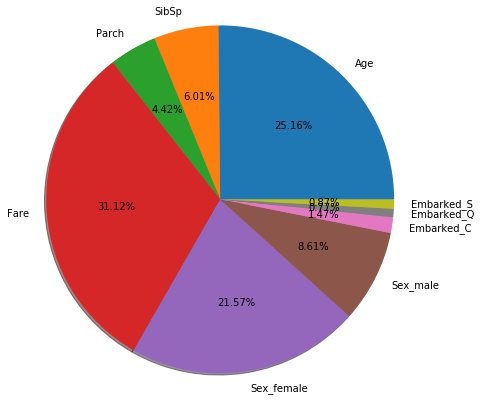

In [100]:
plt.axis('equal')
plt.pie(clf.feature_importances_,labels=X.columns,radius=2,autopct='%0.2f%%',shadow=True)
plt.show()

# Test dataset

In [101]:
df_test = pd.read_csv(r'D:\ML_WORK\Kaggle\Titanic\test_preprocessed.csv')

## input features test

In [102]:
X_test = df_test.loc[:,['Sex', 'Age', 'SibSp','Parch','Fare','Embarked']]


## Onehotencoding

In [103]:
X_test = pd.get_dummies(data=X_test,columns=['Sex','Embarked'])

## Prediction

In [104]:
test_yhat = clf.predict(X_test)

In [105]:
submission = pd.DataFrame(df_test.iloc[:,1])

submission['Survived'] = test_yhat

submission.to_csv(r'D:\ML_WORK\Kaggle\Titanic\submission.csv',index=False)